#  Machine Learning for Bioinformatics
## Practical Homework No.4 (100 points)

#### Name: Aryan Mikaeili
#### Student No.: 95105895


## Imports

run below cell to import necessary libraries. You are only allowed to use these libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)



## Dataset (10 points)

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

In [3]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# load all data using pandas. 
# DataSet.csv as train dataset.
# labels.csv as data labels.
# And Drop columns including call name as these columns as it doesn't have any 
# statistical relevance
##################################################################################### 
Train_Data = pd.read_csv("DataSet.csv")
labels = pd.read_csv("labels.csv")
####################################################################################
#                                   THE END                                        #
####################################################################################  
Train_Data.head()


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,57,58,60,61,65,66,63,64,62,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,178,340,31,396,141,95,146,431,9,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206


Here we go to pre process the data for pca analysis. do these steps one by one

In [4]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# Drop Gene Description and Gene Accession Number to have a numeric matrix.
# the result should be stored in train variable.
#####################################################################################
train = Train_Data.drop(["Gene Description", "Gene Accession Number"],axis=1)
####################################################################################
#                                   THE END                                        #
####################################################################################  
train.index = pd.to_numeric(train.index)
train.sort_index(inplace=True)


## Variable Selection

To reduce the computation costs, instead of working on all 20184 genes present in the dataset, we will focus on 1000 genes that have the most variance.

In [5]:
# TODO: limited_data should contain columns of data corresponding to genes with most variance
limited_data = train.iloc[list(train.std(axis = 1).sort_values()[-1000:].index),:].T

limited_data.head()



,7037,2048,6076,1267,6567,4864,1198,5923,6372,1569,...,4016,6223,1221,5228,5647,1867,5506,18,5710,5709
1,1183,1917,730,536,1624,788,-796,509,695,443,...,19748,-113,20764,8656,31086,-272,21011,15091,17962,17602
2,1434,1603,131,1258,238,1691,-970,286,812,389,...,7657,4452,17636,13285,29288,-194,25240,11038,16964,9868
3,2022,3200,91,2098,1081,1029,-2111,610,810,443,...,1032,775,23324,15704,14835,-79,14950,16692,23436,28056
4,2615,1416,49,254,1223,695,-1555,294,599,509,...,13356,157,21733,15691,25421,-300,31449,15763,22240,23812
5,924,1749,0,127,761,1627,-331,375,282,35,...,13769,2175,20332,3390,29543,-157,12606,18128,5472,3553


## PCA (30 points)


Implement PCA. Then use it to project the data to the latent space. Finally, reconstruct the data and report the reconstruction error for both training and test datasets. Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues of a matrix.

In [6]:
def loss_function(a, b):
  #####################################################################################
  #                          COMPLETE THE FOLLOWING SECTION                           #
  #####################################################################################
  # Implement a function that given the original data and a
  # reconstructed version, returns the reconstruction's mean squared error.
  #####################################################################################
    N = a.shape[1] * a.shape[0]
    result = np.linalg.norm(a - b) / N

  ####################################################################################
  #                                   THE END                                        #
  #################################################################################### 
    return result

In [7]:
def PCA(X, n_components=72):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # n_components: size of latent space (< M)
    # returns a vector of shape (n_components, M) containing the first `n_components` PCs.
    #####################################################################################
    vector = None

    X_hat = X - X.mean(axis = 0)
    S = X_hat.cov()
    eig_vals, eig_vecs = np.linalg.eig(S)
    eig_vecs = eig_vecs[:, np.flip(np.argsort(eig_vals), axis = 0)]
    vector = eig_vecs[:,:n_components].real
    ##just returning the real part because the covariance matrix is semi-definite and the imaginary values(if any)
    ##are computation errors and very close to 0

    ####################################################################################
    #                                   THE END                                        #
    #################################################################################### 
    return vector

In [8]:
pca = PCA(limited_data)

In [9]:
def reconstruct_PCA(X : pd.DataFrame):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # Compute PCs for the X.
    # Project X to the space of computed PCs.
    # Reconstruct X from projected data.
    #####################################################################################
    principal_components = PCA(X)
    m = X.mean(axis = 0)
    X = X.values
    projected_data = np.matmul(X - m.values, principal_components)
    reconstructed_data = np.matmul(projected_data, principal_components.T) + m.values
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################     
    return reconstructed_data


In [10]:
pca_rec = reconstruct_PCA(limited_data)

In [11]:
## Run This cell to find how your functions working!
loss_function(pca_rec , limited_data.values.tolist())

8.597072296077675e-14

## K-Means (20 points)



read the below cell codes. this is using sklearn pca implementation. we use this function to use in our kmeans clustering.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(limited_data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf = principalDf.set_index(labels.index)
finalDf = pd.concat([principalDf, labels['cancer']], axis = 1)
finalDf


,PC1,PC2,cancer
0,4.341201,-4.770876,ALL
1,14.195648,1.693615,ALL
2,14.183927,-1.751281,ALL
3,1.756293,-3.357066,ALL
4,11.519685,-9.365314,ALL
...,...,...,...
67,-9.111561,-8.859135,ALL
68,9.836477,22.720626,ALL
69,-1.017386,19.754260,ALL
70,-4.869207,17.797069,ALL


here we try to initialize centroids. Note that we already knows we have two cluster, So from our prior knowledge we define number of clusters equal to two.

In [98]:
np.random.seed(600)
# Number of clusters
k = 2
X = np.array(list(zip(finalDf['PC1'], finalDf['PC2'])))
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 4. 11.]
 [11. 27.]]


Now you can see the unlabeled data and our initialization data by running following cell

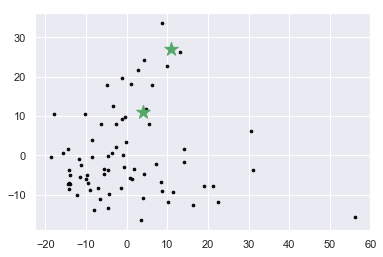

In [99]:
# Plotting along with the Centroids
plt.scatter(finalDf['PC1'], finalDf['PC2'], c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

It's your turn. Implement K-Means function which return a np.array with size equal to your data. this array contain each point label that you assigned using kmeans clustering.

In [100]:
def Kmeans(X, Centroids):
      clusters = np.zeros(len(X))
      # To store the value of centroids when it updates
      C = Centroids
      C_old = np.zeros(C.shape)
      # Cluster Lables(0, 1)
      clusters = np.zeros(len(X))
      # Error func. - Distance between new centroids and old centroids
      error = np.linalg.norm(C - C_old)
      ####################################################################################
      #                          COMPLETE THE FOLLOWING SECTION                          #
      ####################################################################################
      # Implement K-Means Clustering
      # Assigning each value to its closest cluster
      # Storing the old centroid values
      # Finding the new centroids by taking the average value
      # clusters variable should contain (0,1) labels. 0 for first cluster and 1 for the second. 
      ####################################################################################
      # Loop will run till the error becomes zero
      # Do Not Forget to update error condition.
      while error != 0:
        data_sq = np.repeat([np.power(np.linalg.norm(X, axis=1), 2)], C.shape[0], axis=0).T
        eps_sq = np.repeat([np.power(np.linalg.norm(C, axis=1), 2)], X.shape[0], axis=0)
        te = 2 * np.matmul(X, C.T)
        dists = np.sqrt(data_sq + eps_sq - te)
        clusters = np.argmin(dists, axis=1)
        C_old = np.copy(C)
        for j in range(2):
            if len(X[clusters == j]) > 0:
                C[j] = np.mean(X[clusters == j], axis=0)
            else:
                C[j] = np.mean(np.concatenate([C[:j, ], C[j + 1:, ]], axis=0), axis=0)
        num_clusters = np.unique(clusters,return_counts=True)[1]
        print(num_clusters)
        error = np.linalg.norm(C - C_old)
        

      ####################################################################################
      #                                   THE END                                        #
      ####################################################################################
      return clusters

In [101]:
clusters = Kmeans(X, C)

[67  5]
[61 11]
[58 14]
[57 15]
[55 17]
[53 19]
[53 19]


(array(['ALL', 'AML'], dtype='<U3'), array([47, 25], dtype=int64))

Now just run cell below to plot your result. 

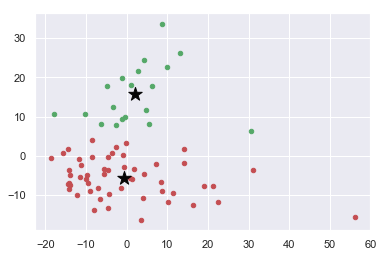

In [102]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

This part shows real labels of the samples. just run this cell and answer the next question. 

(-20, 25)

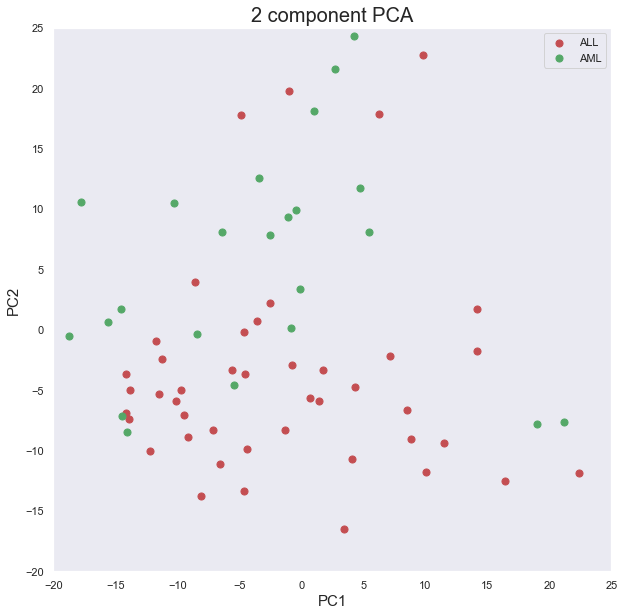

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['ALL','AML']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
ax.set_xlim([-20, 25])
ax.set_ylim([-20, 25])

Compare your results with the figure above and tell us what will change if we change the random seed (try it with two or three different seeds) and what is the solution?

--> 
      because KNN is very dependant to its initial points, with different random seeds, the results differ. because the algorithm gets stuck in different locol minima. in particular, this data has many outliers and that causes a problem in clustering. however the algorithm is successful in clustering the points that are not close to eachother and couldn;t be in the same cluster.
<--

## GMM (30 points)

The EM algorithm for GMM can be simplified in the following steps:

Assuming K is the number of clusters, and N is the number of data points


$z_j^i$ is 1 if $x^i$ is generated from mixture j

Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$ k=1,...K


$\theta=[\pi,\mu,\Sigma]$
## E step:
$\gamma_j^i=P(z_j^i=1|x^i, \theta^{old})=\frac{\pi_j^{old}\mathcal{N}(x^i|\mu_j^{old},\Sigma_j^{old})}{\sum_{k=1}^K\pi_k^{old}\mathcal{N}(x^i|\mu_k^{old},\Sigma_k^{old})}$

## M step:
$\mu_j^{new}=\frac{\sum_{i=1}^N \gamma_j^i x^i}{\sum_{i=1}^N \gamma_j^i}$


$\Sigma_j^{new} = \frac{1}{\sum_{i=1}^N \gamma_j^i} \sum_{i=1}^N \gamma_j^i (x^i-\mu_j^{new}) (x^i-\mu_j^{new})^T$


$\pi_j^{new} = \frac{\sum_{i=1}^N \gamma_j^i}{N}$

Repeat E and M steps until convergence.


In [63]:
from scipy.stats import multivariate_normal
class GMM(object):
    def __init__(self, x, k, iterations):
        self.x = x
        self.n = x.shape[0]  # data points
        self.f = x.shape[1]  # features
        self.k = k  # number of clusters
        self.iterations = iterations

        self.predictions = None

        C_x = np.random.randint(0, np.max(x) - 20, size=k)
        # Y coordinates of random centroids
        C_y = np.random.randint(0, np.max(x) - 20, size=k)
        C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

        clusters =Kmeans(x, C)

        # TODO: initialte parameters
        self.pi = np.ones((self.k,)) / self.k  # of size (k)
        self.mu = np.zeros((self.k, self.f))  # of size (k, f)
        self.sigma = np.zeros((self.k, self.f, self.f))  # of size (k, f, f)

        for i in range(self.k):
            self.mu[i] = np.mean(x[clusters == i], axis=0)
            self.sigma[i] = np.cov(x[clusters == i].T)

    def calc_gamma(self):
        # TODO: calculate gamma matrix based on parameters and x
        gammas = np.zeros((self.n, self.k))
        for i in range(self.n):
            for j in range(self.k):
                gammas[i, j] = multivariate_normal.pdf(self.x[i], self.mu[j], self.sigma[j]) * self.pi[j]

        for i in range(self.n):
            gammas[i] = gammas[i] / np.sum(gammas[i])
         # returns a matrix of shape (n, k) where n is the number of data points
        return gammas
        pass

    def update_mu(self, gamma):
        # TODO: update self.mu based on x and gamma matrix
        self.mu = np.matmul(self.x.T, gamma).T / np.sum(gamma, axis=0)
        #for i in range(self.k):
            #self.mu[i] = self.mu[i] / np.sum(gamma[:,i])
        pass

    def update_sigma(self, gamma):
        # TODO: update self.sigma based on x, mu and gamma matrix
        for j in range(self.k):
            self.sigma[j] = np.zeros((self.f, self.f))
            for i in range(self.n):
                normalized_x = self.x[i] - self.mu[j]
                self.sigma[j] += (np.outer(normalized_x, normalized_x) * gamma[i, j])
            self.sigma[j] = self.sigma[j] / np.sum(gamma[:,j])
        pass

    def update_pi(self, gamma):
        # TODO: update self.pi based on gamma matrix
        self.pi = np.sum(gamma, axis= 0) / self.n
        pass

    def fit(self):
        for i in range(self.iterations):
            gamma = self.calc_gamma()
            self.update_mu(gamma)
            self.update_sigma(gamma)
            self.update_pi(gamma)
            print(i)


        # TODO: predict the mixture for each data
        self.predicitions = np.zeros(self.n)
        self.predictions = np.argmax(gamma, axis=1)

In [69]:
gmm = GMM(X, 2, 100)
gmm.fit()
gmm_clusters = gmm.predictions 
print(np.unique(gmm_clusters, return_counts= True))
print(np.unique(finalDf['cancer'],return_counts = True))

[55 17]
[56 16]
[56 16]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
(array([0, 1], dtype=int64), array([41, 31], dtype=int64))
(array(['ALL', 'AML'], dtype=object), array([47, 25], dtype=int64))


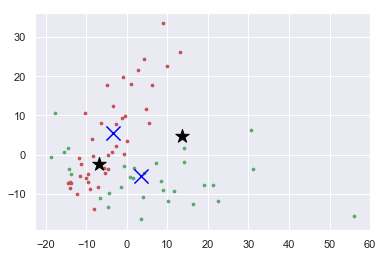

In [70]:
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if gmm_clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
ax.scatter(gmm.mu[:,0], gmm.mu[:, 1], marker='x', s=200, c='blue')

## t-SNE (10 points)

In this part we are using a generated dataset to test the effect of t-SNE hyperparameters.
The data points are on two paralllel lines with a small additive noise.

In [165]:
# load the dataset

X = np.load('X.npy')
y = np.load('y.npy')
print(X.shape)
print(y.shape)

(200, 20)
(200,)


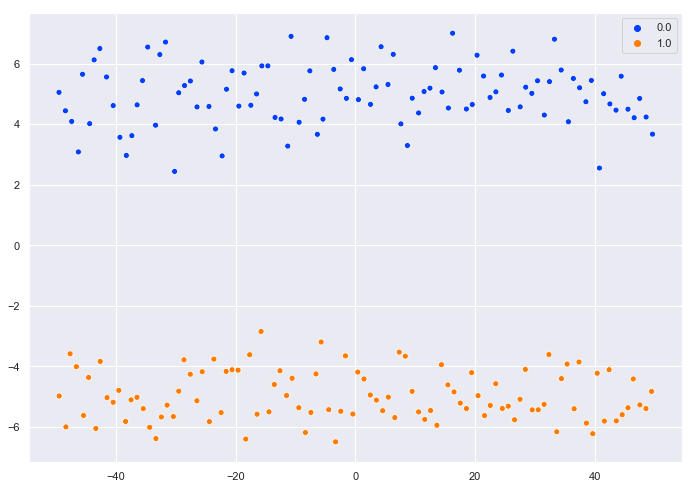

In [166]:
# plot data in 2 dimensions using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=y, legend='full', palette=palette)

Find the best hyperparameters such that the output of t-SNE is similar to the output of PCA. Please make sure that your results are stable. Try running t-SNE a few times until you get the same results.

You can use [this link](https://distill.pub/2016/misread-tsne/) for help!

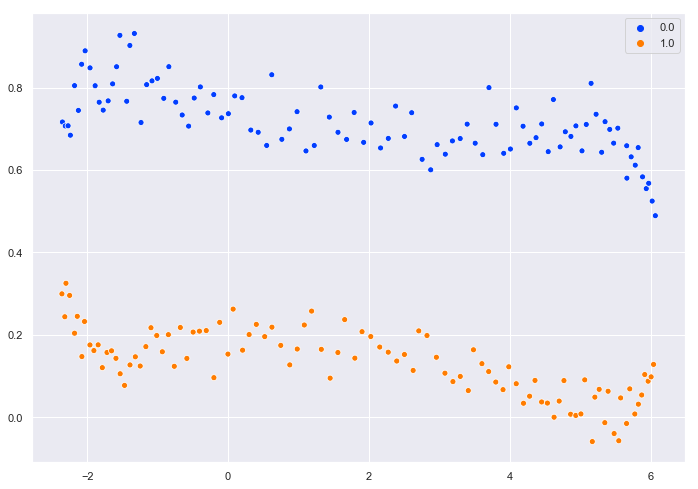

In [388]:

tsne = TSNE(perplexity = 96, n_iter = 7500, learning_rate = 250, random_state = 1500)
#tsne = TSNE(perplexity = 45, n_iter = 7500, learning_rate = 250, random_state = 1)# TODO: set hyperparameters

X_embedded = tsne.fit_transform(X)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

Are the lines perfectly straight? Can you explain why? 

--> 
the displayed graph is very similar to the original graph. however if we want to see straight lines we would better run the lower line with lower perplexity because in this way the model gives more attention to local structure and we can see a perfect line. however in the current state we give attention to the global structure. as a result the shape of the data would be preserved<--